In [1]:
import uproot
import vector
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
def load_MG_data(data, labels):
    with uproot.open(data+":events") as f:
        pid = f['pid'].array()
        px = f['px'].array()
        py = f['py'].array()
        pz = f['pz'].array()
        m = f['mass'].array()

    vectors = vector.Array(ak.zip({"px": px, "py": py, "pz": pz, "m": m}))
    top_quark_mask = pid==6
    top_quark = vectors[top_quark_mask]

    with uproot.open(labels+":labels") as f:
        costheta_down = f['costheta_down'].array()
        costheta_bottom = f['costheta_bottom'].array()
        
    return (top_quark, costheta_down, costheta_bottom)

In [3]:
polarizations = ["U", "L", "R"]

In [4]:
MG_results = {}
for p in polarizations:
    MG_results[p] = load_MG_data("madgraph/pp_tt_semi_full_"+p+"_1M_gen/combined.root", "madgraph/pp_tt_semi_full_"+p+"_1M_gen/labels.root")

In [5]:
print("Number of Gen Events: ", len(MG_results["U"][1]))

Number of Gen Events:  1000000


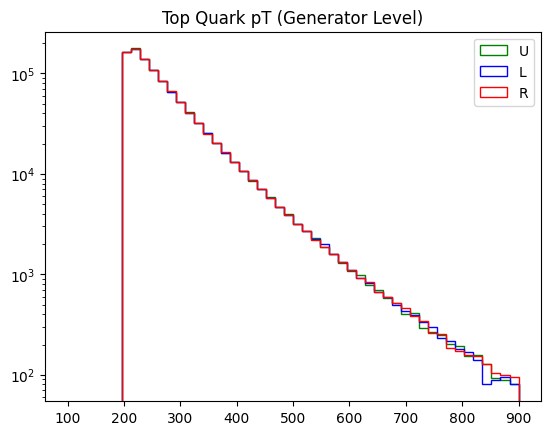

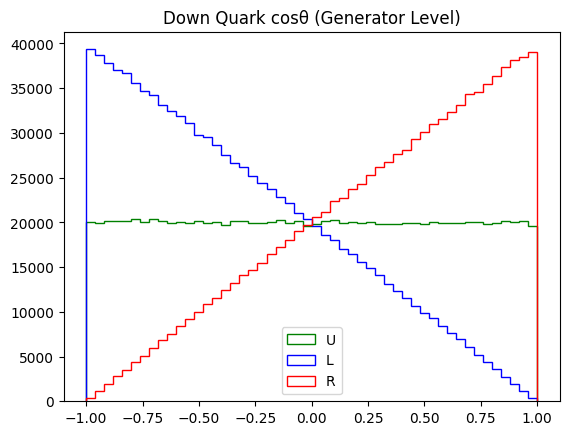

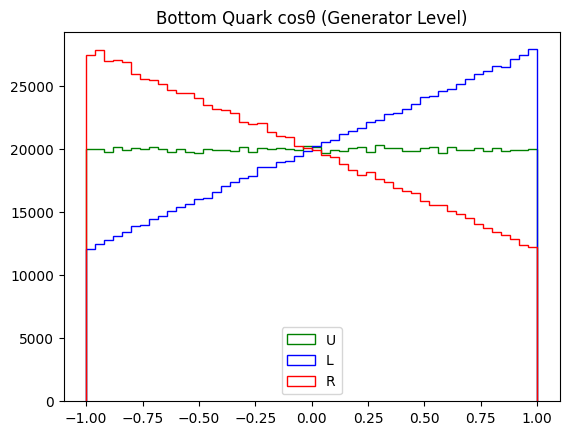

In [6]:
bins=50

color = ['g','b','r']

plt.title("Top Quark pT (Generator Level)")
for i, p in enumerate(polarizations):
    plt.hist(ak.ravel(MG_results[p][0].pt), histtype='step', bins=bins, range=(100,900),label=p,color=color[i])
plt.yscale('log')
plt.legend()
plt.show()

plt.title("Down Quark cos\u03B8 (Generator Level)")
for i, p in enumerate(polarizations):
    plt.hist(ak.ravel(MG_results[p][1]), histtype='step', bins=bins, range=(-1,1),label=p,color=color[i])
plt.legend()
plt.show()

plt.title("Bottom Quark cos\u03B8 (Generator Level)")
for i, p in enumerate(polarizations):
    plt.hist(ak.ravel(MG_results[p][2]), histtype='step', bins=bins, range=(-1,1),label=p,color=color[i])
plt.legend()
plt.show()

In [7]:
polarizations = ["U", "L", "R"]
Rs = ["1_0", "1_5", "2_0"]
minJetpTs = ["250", "400", "550"]

In [8]:
def load_results(p, R, pT):
    with uproot.open("pythia/WS_"+p+"_10M_R"+R+"_pT"+pT+"_BTAG/combined.root:fastjet") as f:
        #print(f.keys())
        fatjet_pt = f['probe_jet_pT'].array()
        costheta_down = f['costheta_down'].array()
        costheta_bottom = f['costheta_bottom'].array()

        probe_jet_pT = f['probe_jet_pT'].array()
        probe_jet_eta = f['probe_jet_eta'].array()
        probe_jet_phi = f['probe_jet_phi'].array()
        probe_jet_mass = f['probe_jet_mass'].array()
        probe_jet_vec = vector.Array(ak.zip({"pt": probe_jet_pT, "eta": probe_jet_eta, "phi": probe_jet_phi, "mass": probe_jet_mass}))

        top_px_lab = f['top_px_lab'].array()
        top_py_lab = f['top_py_lab'].array()
        top_pz_lab = f['top_pz_lab'].array()
        top_e_lab = f['top_e_lab'].array()
        top_vec = vector.Array(ak.zip({"px": top_px_lab, "py": top_py_lab, "pz": top_pz_lab, "e": top_e_lab}))

        deltaR = probe_jet_vec.deltaR(top_vec)

        balance_jets_btag = f['balance_jets_btag'].array()
        num_b_jets = ak.num(balance_jets_btag[balance_jets_btag==1])

        return (fatjet_pt, costheta_down, costheta_bottom, deltaR, num_b_jets)

In [9]:
results = {}
for p in polarizations:
    for R in Rs:
        for pT in minJetpTs:
            results[(p, R, pT)] = load_results(p,R,pT)

Num Events after Reco Selections:  108635


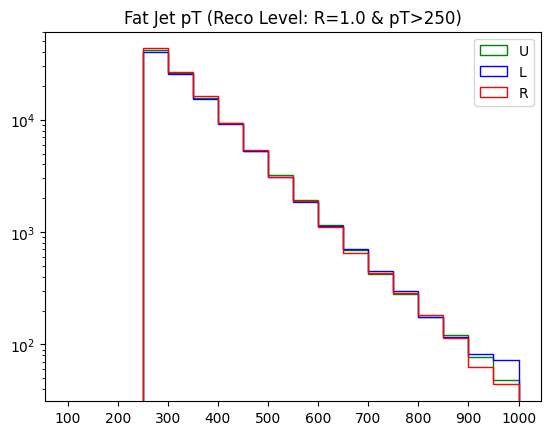

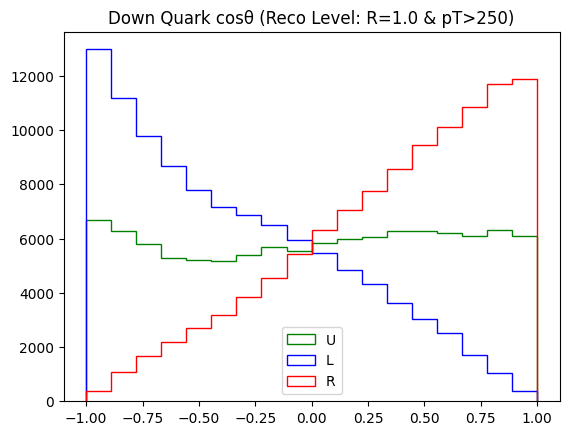

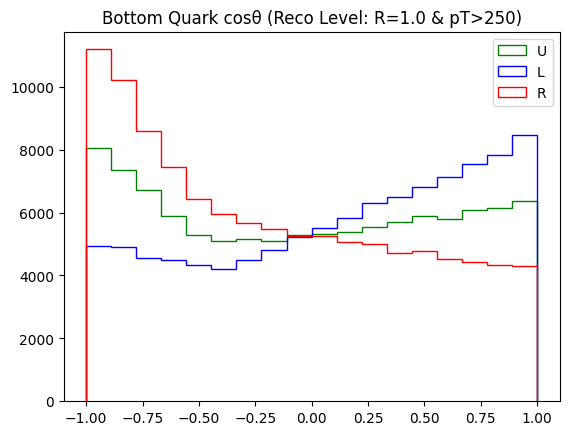

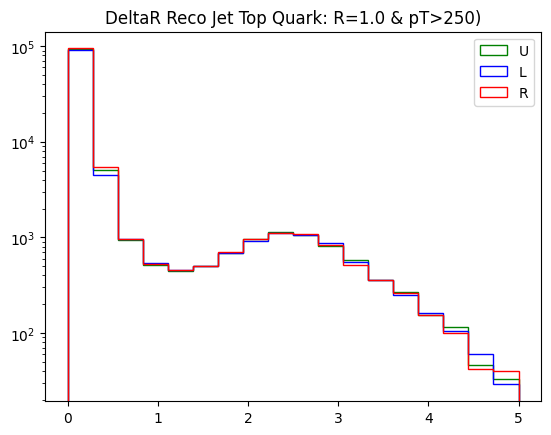

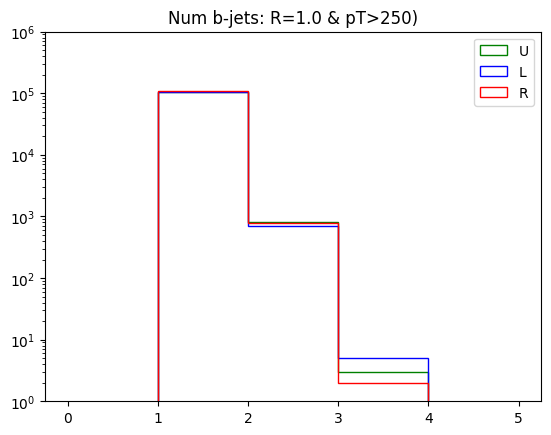

Num Events after Reco Selections:  22715


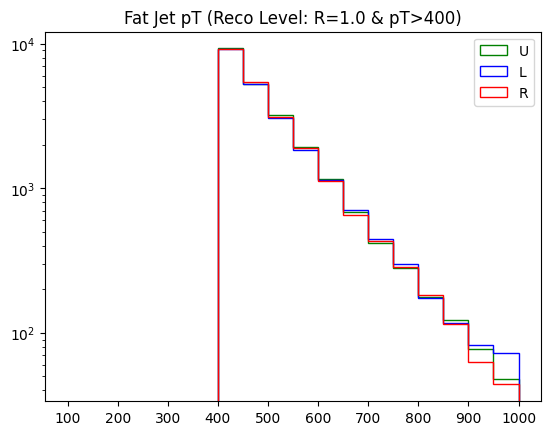

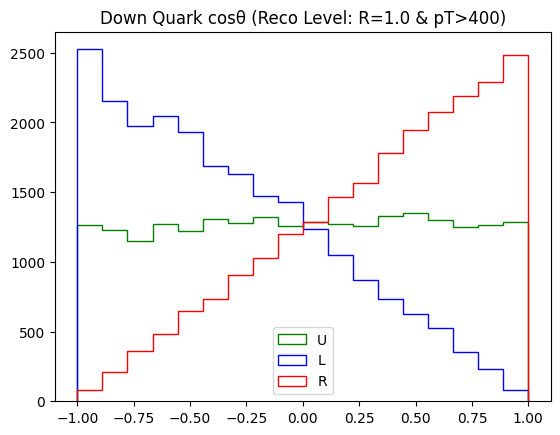

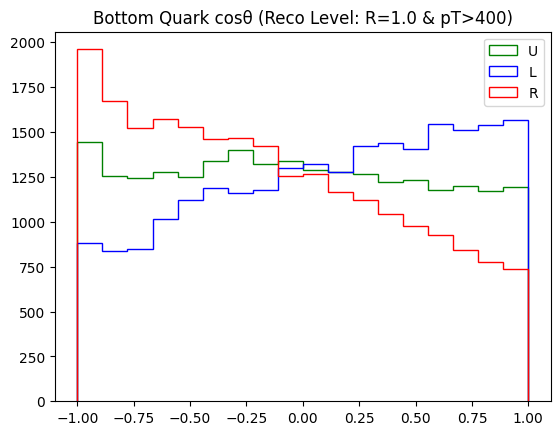

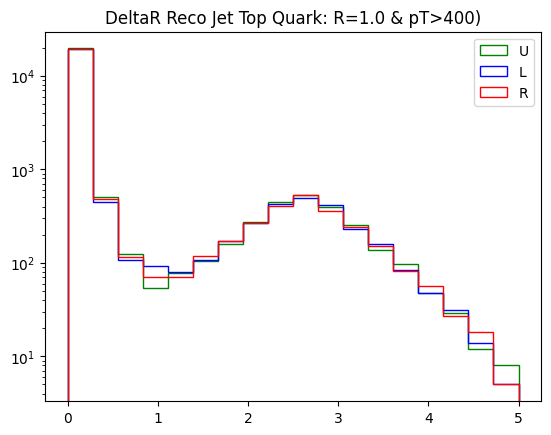

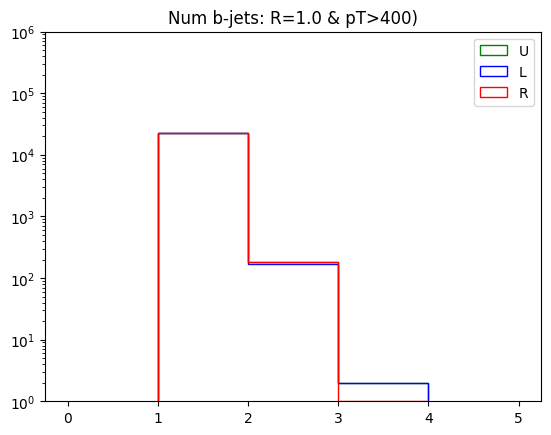

Num Events after Reco Selections:  4913


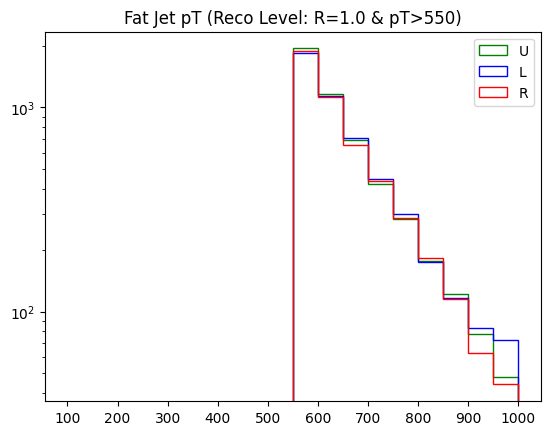

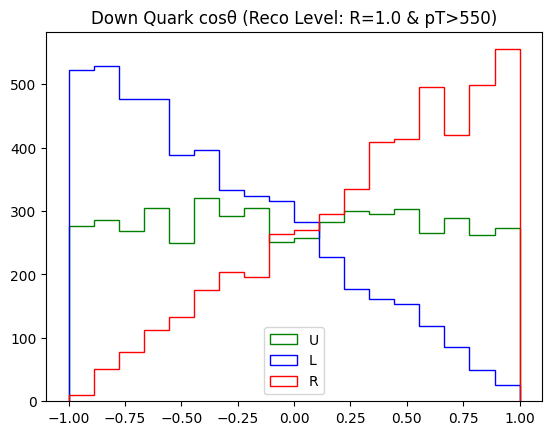

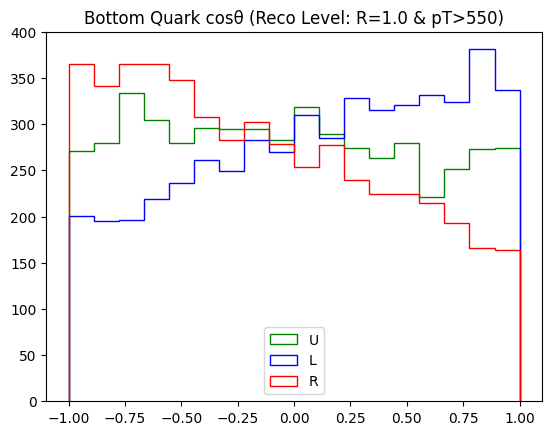

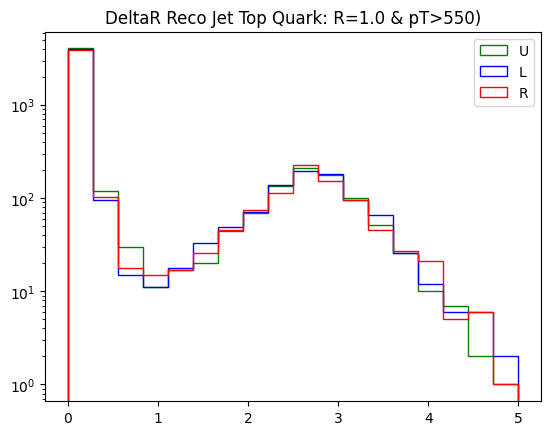

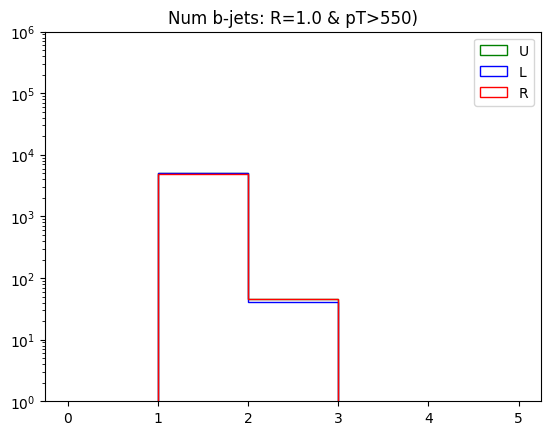

Num Events after Reco Selections:  148649


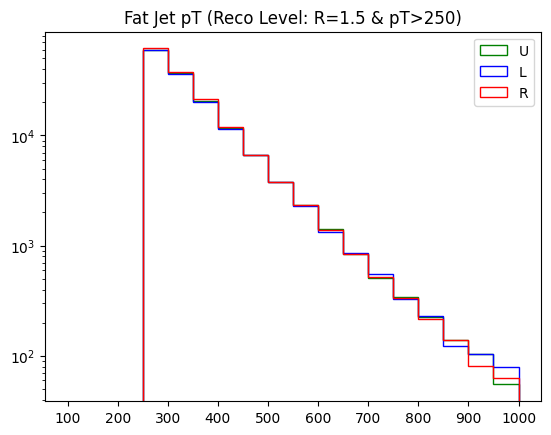

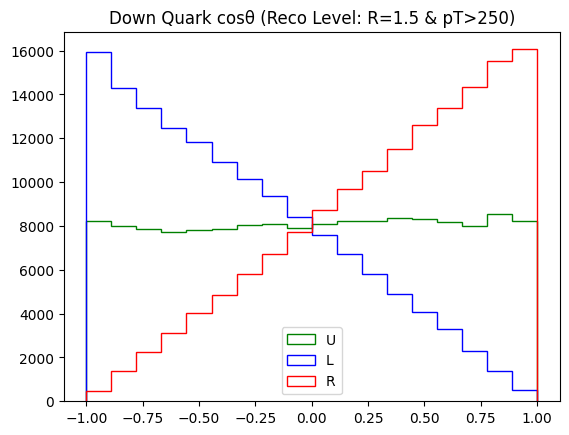

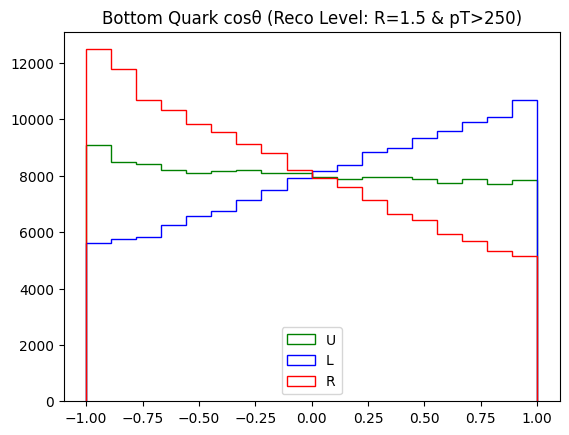

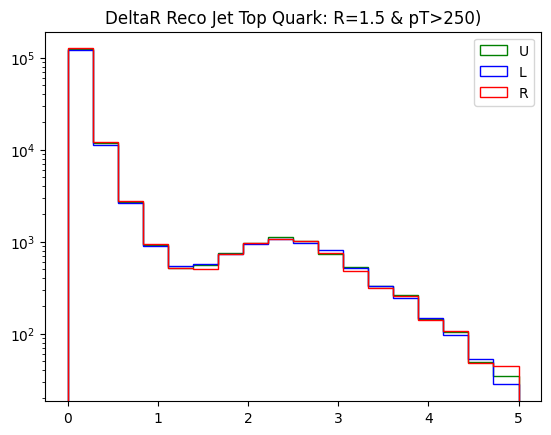

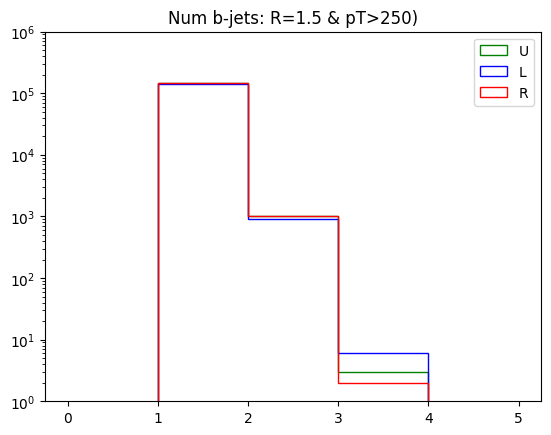

Num Events after Reco Selections:  28358


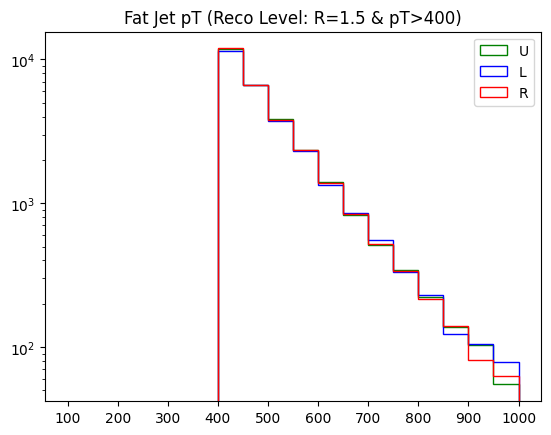

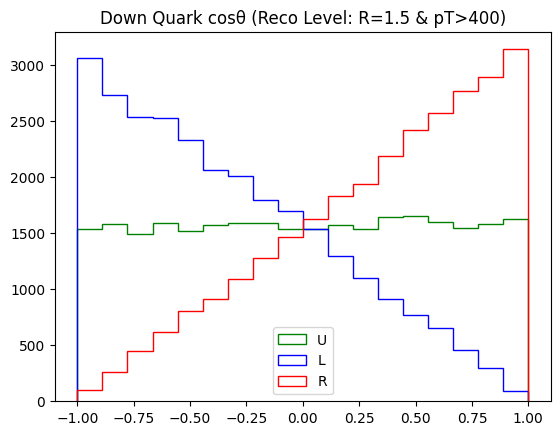

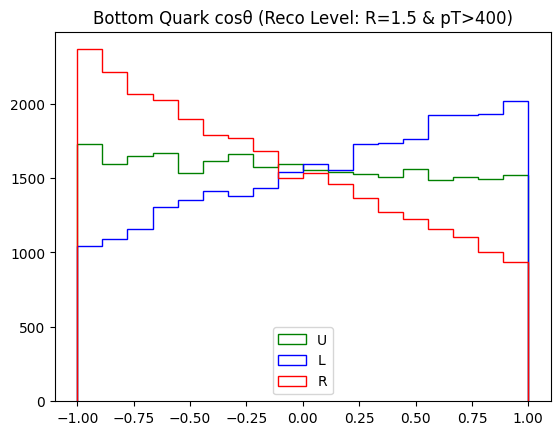

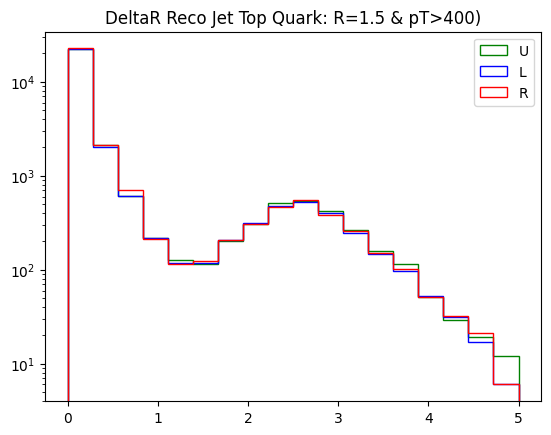

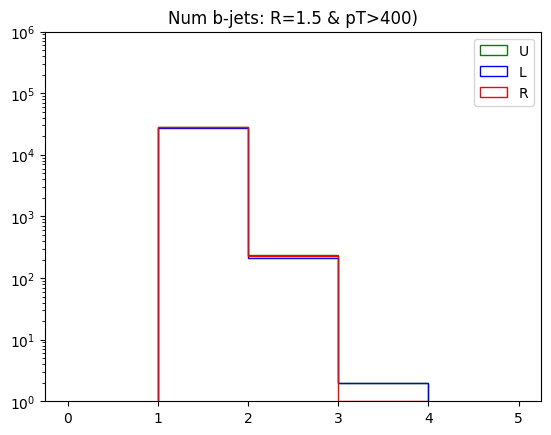

Num Events after Reco Selections:  6046


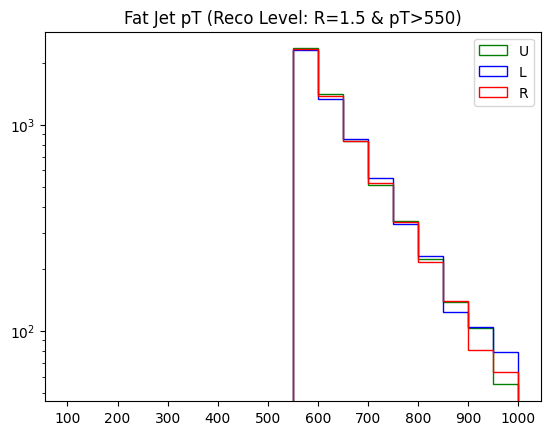

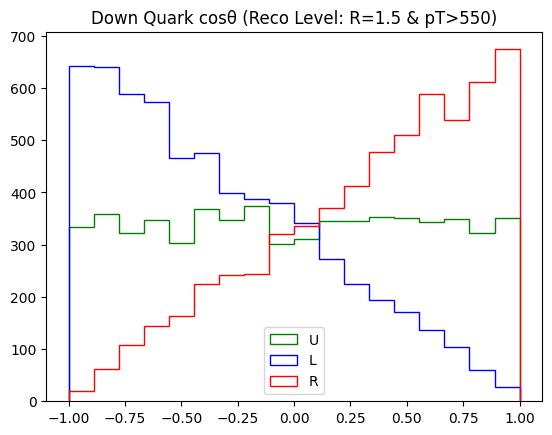

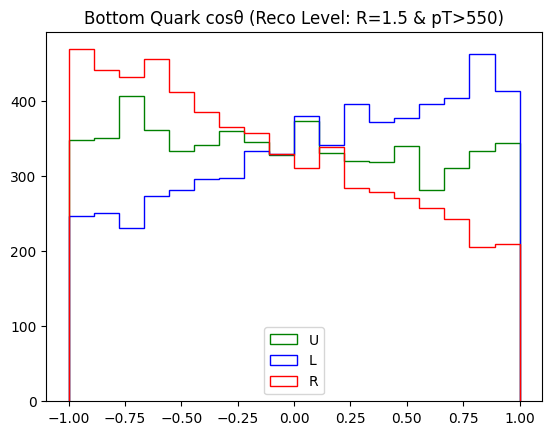

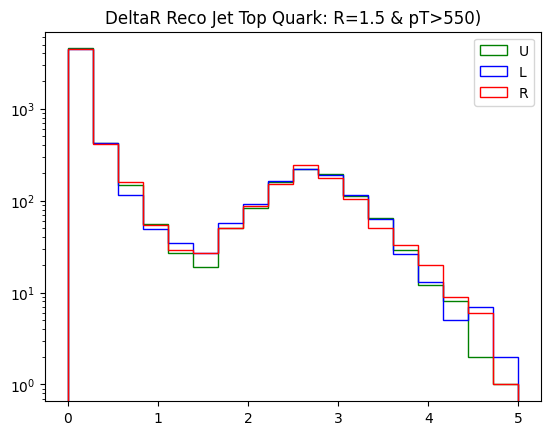

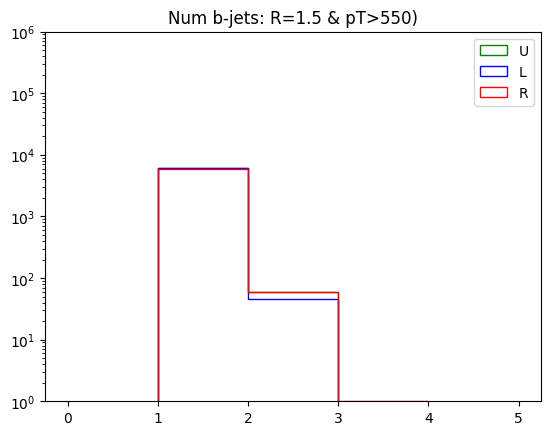

Num Events after Reco Selections:  158559


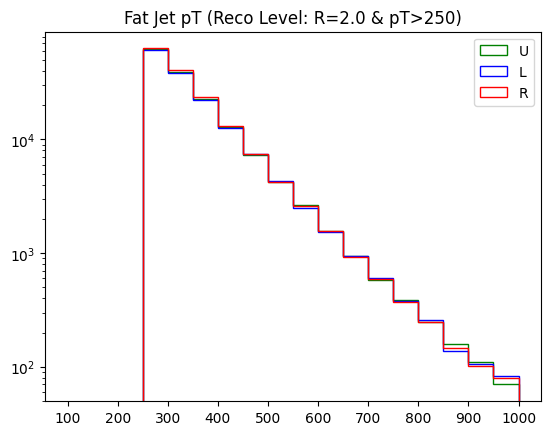

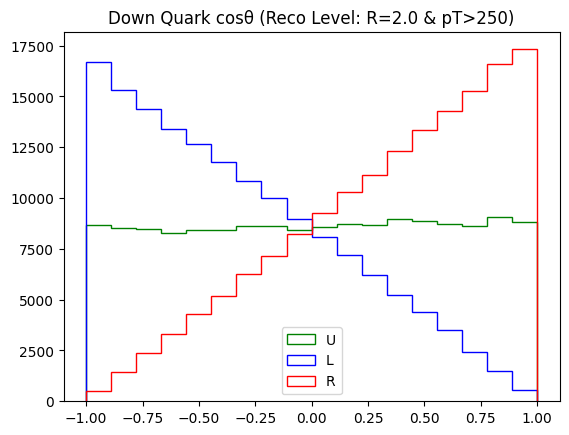

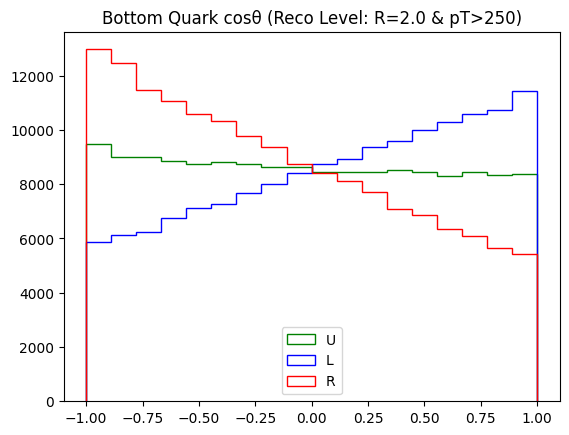

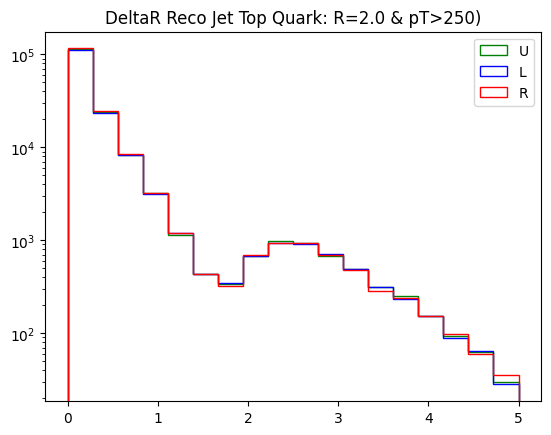

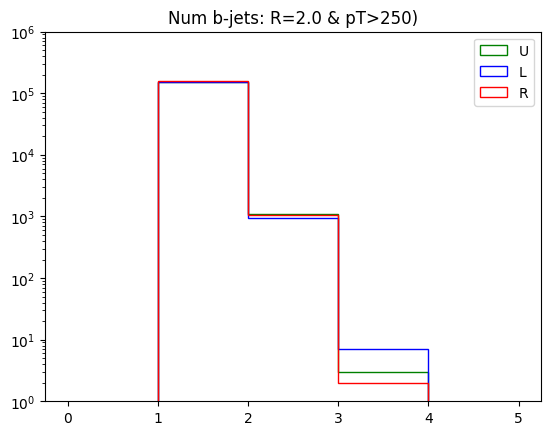

Num Events after Reco Selections:  31597


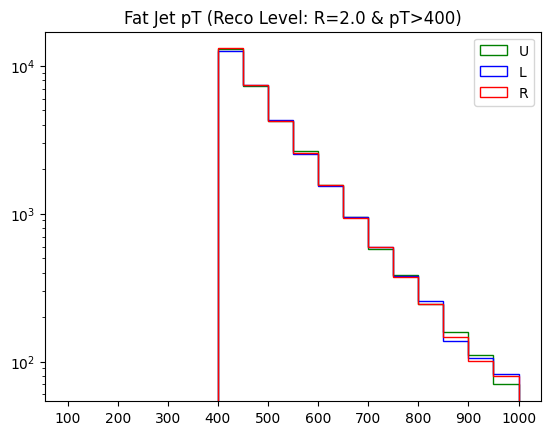

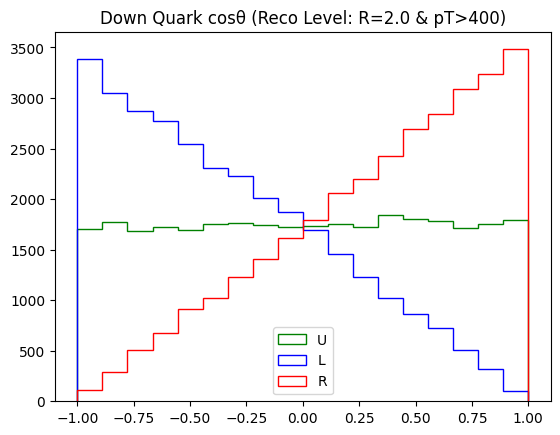

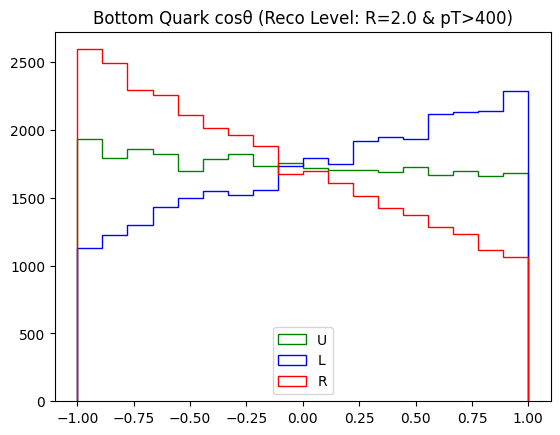

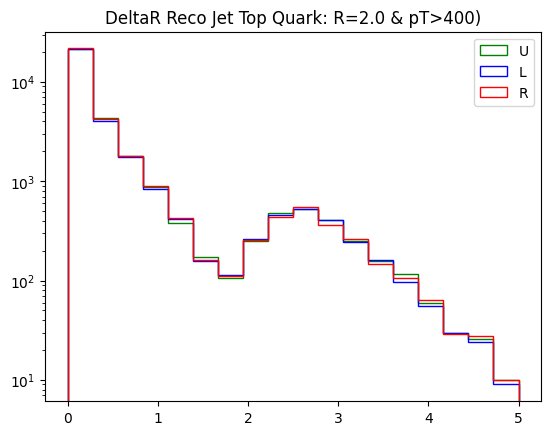

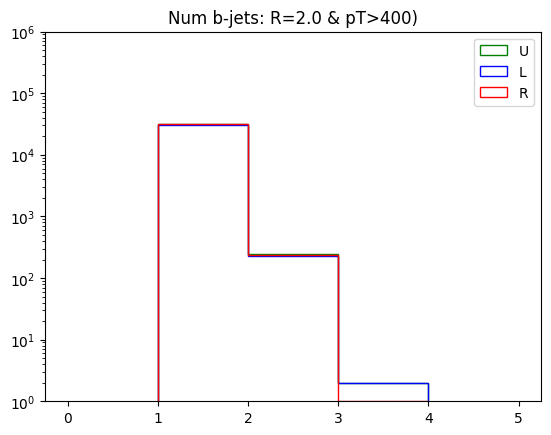

Num Events after Reco Selections:  6783


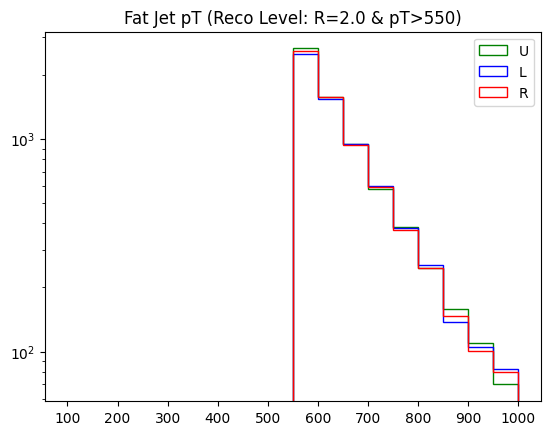

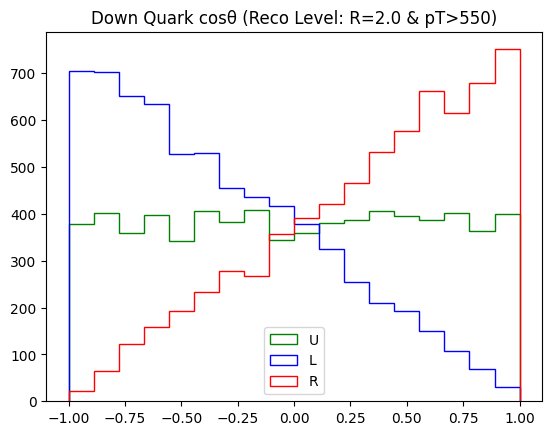

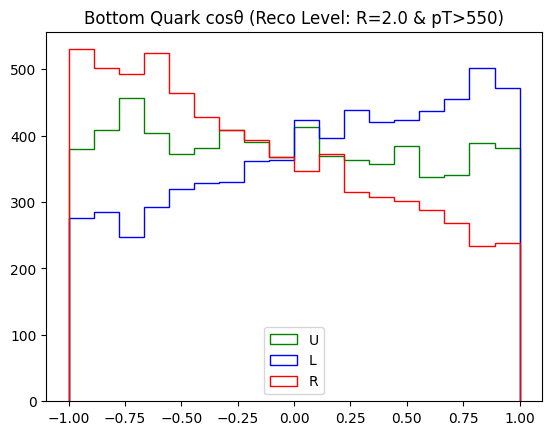

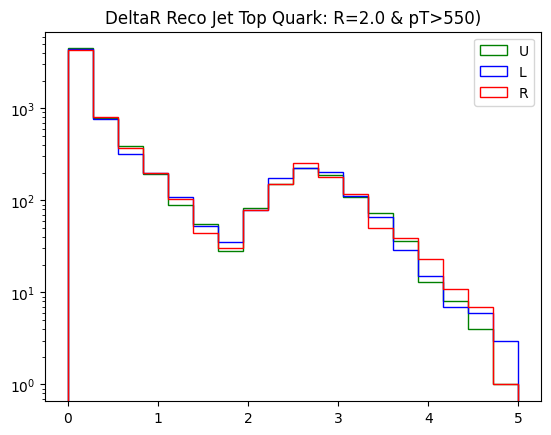

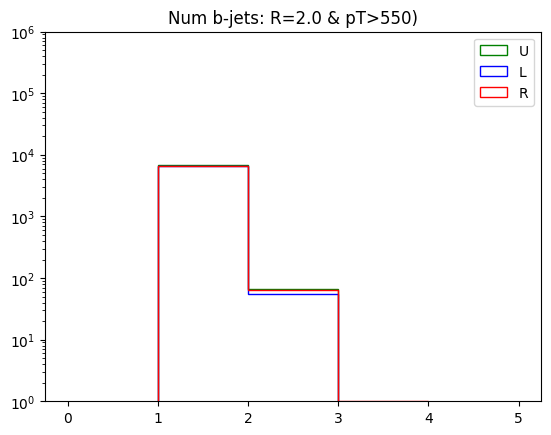

In [10]:
bins=18

color = ['g','b','r']

for R in Rs:
    for pT in minJetpTs:
        R_str = R.replace("_", ".")

        print("Num Events after Reco Selections: ", ak.count(ak.ravel(results[p,R,pT][0])))
        
        plt.title("Fat Jet pT (Reco Level: R="+R_str+" & pT>"+pT+")")
        for i, p in enumerate(polarizations):
            plt.hist(ak.ravel(results[p,R,pT][0]), histtype='step', bins=bins, range=(100,1000),label=p,color=color[i])
        plt.yscale('log')
        plt.xticks(np.arange(100, 1001, 100))
        plt.legend()
        plt.show()
        
        plt.title("Down Quark cos\u03B8 (Reco Level: R="+R_str+" & pT>"+pT+")")
        for i, p in enumerate(polarizations):
            plt.hist(ak.ravel(results[p,R,pT][1]), histtype='step', bins=bins, range=(-1,1),label=p,color=color[i])
        plt.legend()
        plt.show()
        
        plt.title("Bottom Quark cos\u03B8 (Reco Level: R="+R_str+" & pT>"+pT+")")
        for i, p in enumerate(polarizations):
            plt.hist(ak.ravel(results[p,R,pT][2]), histtype='step', bins=bins, range=(-1,1),label=p,color=color[i])
        plt.legend()
        plt.show()

        plt.title("DeltaR Reco Jet Top Quark: R="+R_str+" & pT>"+pT+")")
        for i, p in enumerate(polarizations):
            plt.hist(ak.ravel(results[p,R,pT][3]), histtype='step', bins=bins, range=(0,5),label=p,color=color[i])
        plt.legend()
        plt.yscale('log')
        plt.show()

        plt.title("Num b-jets: R="+R_str+" & pT>"+pT+")")
        for i, p in enumerate(polarizations):
            plt.hist(ak.ravel(results[p,R,pT][4]), histtype='step', bins=5, range=(0,5),label=p,color=color[i])
        plt.legend()
        plt.ylim(1,10e5)
        plt.yscale('log')
        plt.show()